<a href="https://colab.research.google.com/github/Shravinya/Infosys/blob/main/task1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# -----------------------------
# 1️⃣ Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# -----------------------------
# 2️⃣ Mount Google Drive
# -----------------------------
from google.colab import drive
drive.mount('/content/drive')

# Set path to your folder inside Drive
folder_path = "/content/drive/MyDrive/"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

# -----------------------------
# 3️⃣ Load Dataset
# -----------------------------
data_path = os.path.join(folder_path, "car_sales_data.csv")
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print("Columns before cleaning:", df.columns)



Dataset shape: (50000, 7)
Columns before cleaning: Index(['Manufacturer', 'Model', 'Engine size', 'Fuel type',
       'Year of manufacture', 'Mileage', 'Price'],
      dtype='object')


In [6]:
# -----------------------------
# 4️⃣ Clean Column Names
# -----------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Columns after cleaning:", df.columns)


Columns after cleaning: Index(['manufacturer', 'model', 'engine_size', 'fuel_type',
       'year_of_manufacture', 'mileage', 'price'],
      dtype='object')


In [9]:
# -----------------------------
# 5️⃣ Data Cleaning & Preprocessing
# -----------------------------

# Find duplicates
duplicates = df[df.duplicated()]
print("Number of duplicate rows found:", duplicates.shape[0])

if not duplicates.empty:
    print("\nDuplicate rows preview:")
    print(duplicates.head())

# Drop duplicates
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Convert numeric columns
df['year_of_manufacture'] = pd.to_numeric(df['year_of_manufacture'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

# Drop rows with missing values
before_dropna = df.shape[0]
df = df.dropna()
after_dropna = df.shape[0]

print(f"Dropped {before_dropna - after_dropna} rows containing NaN values")
print("Final dataset shape:", df.shape)


Number of duplicate rows found: 0
Shape after dropping duplicates: (49988, 7)
Dropped 0 rows containing NaN values
Final dataset shape: (49988, 7)


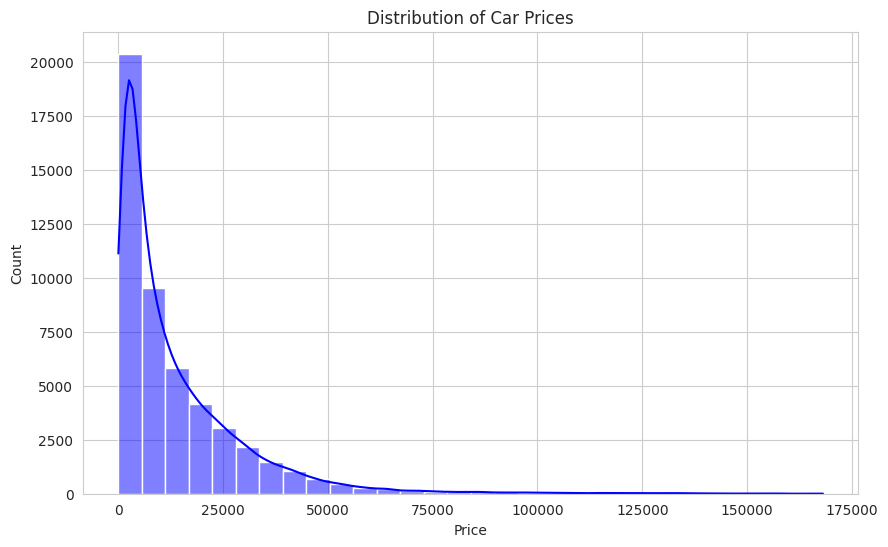

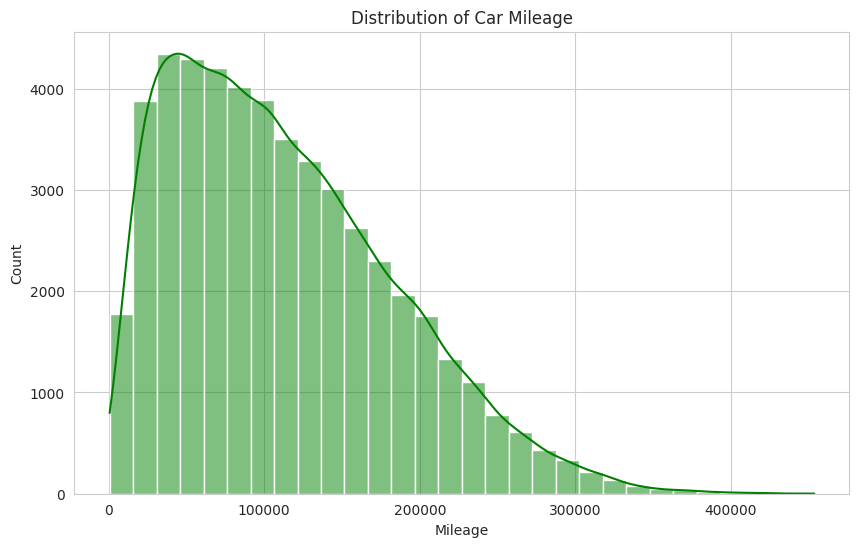

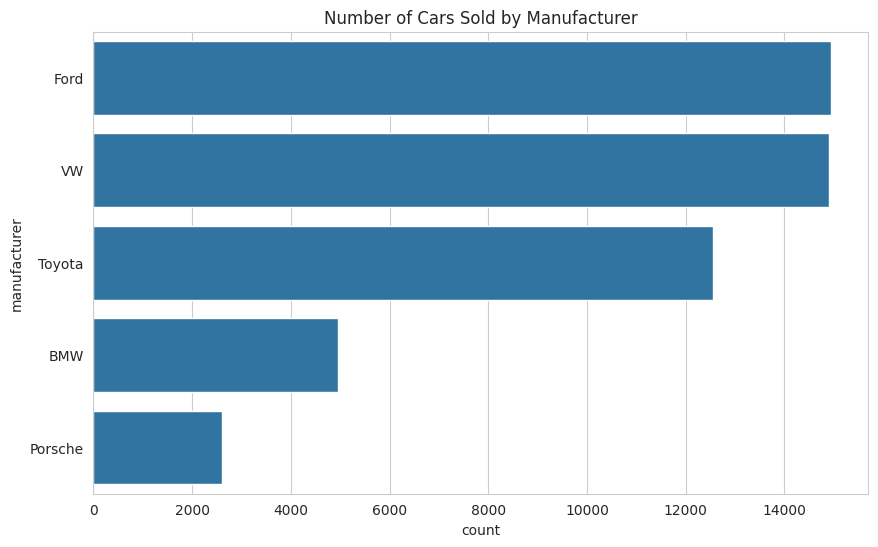

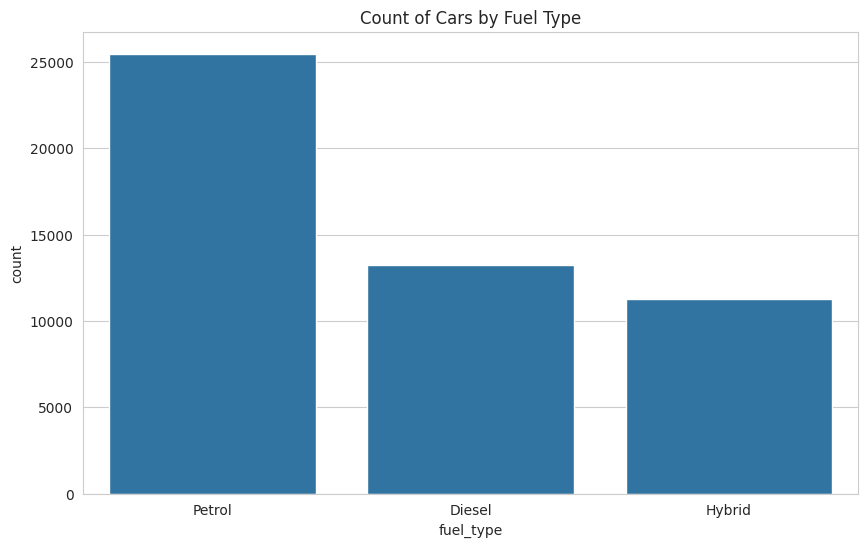

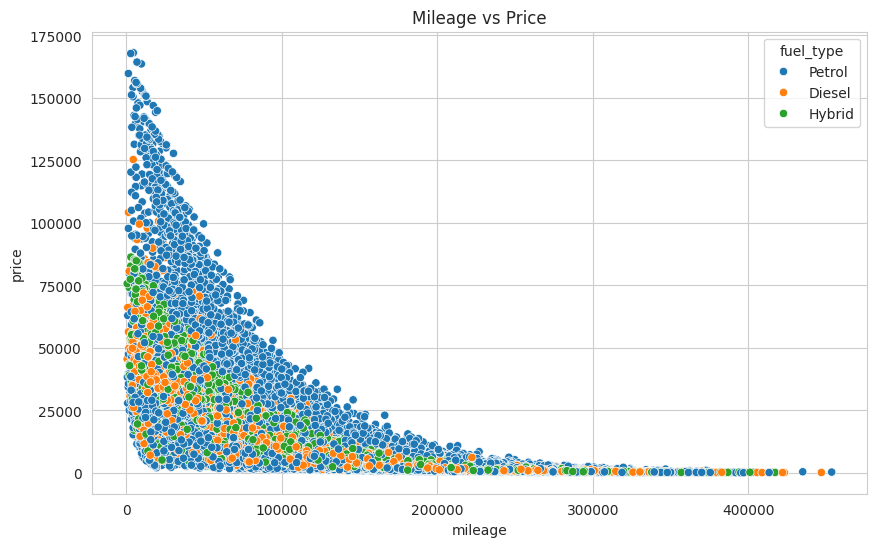

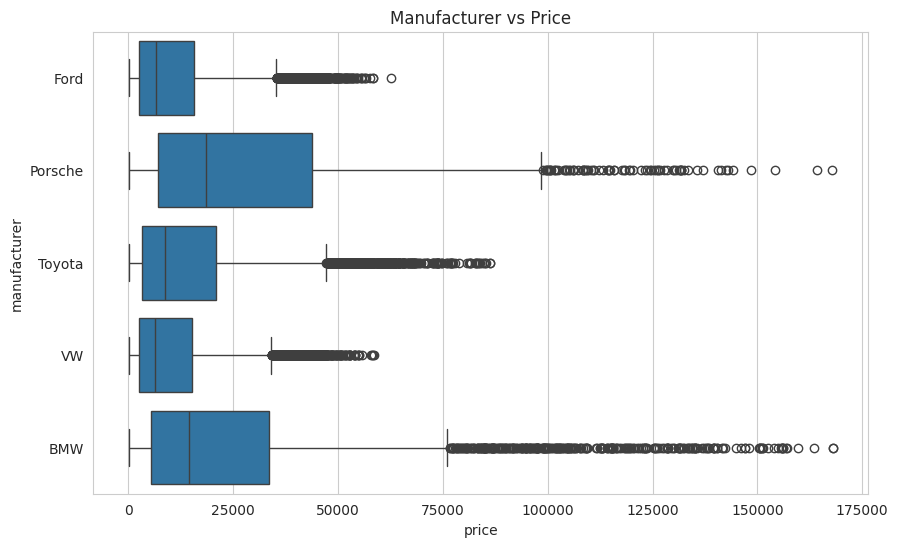

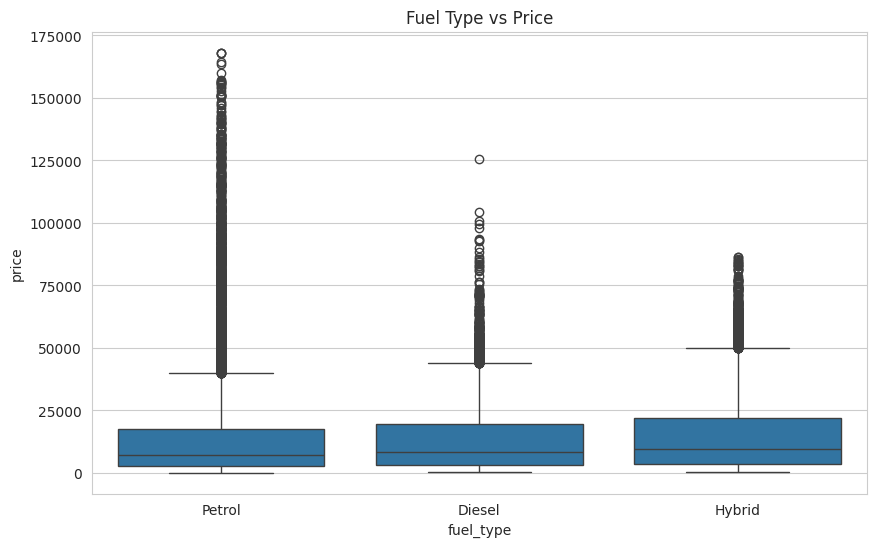

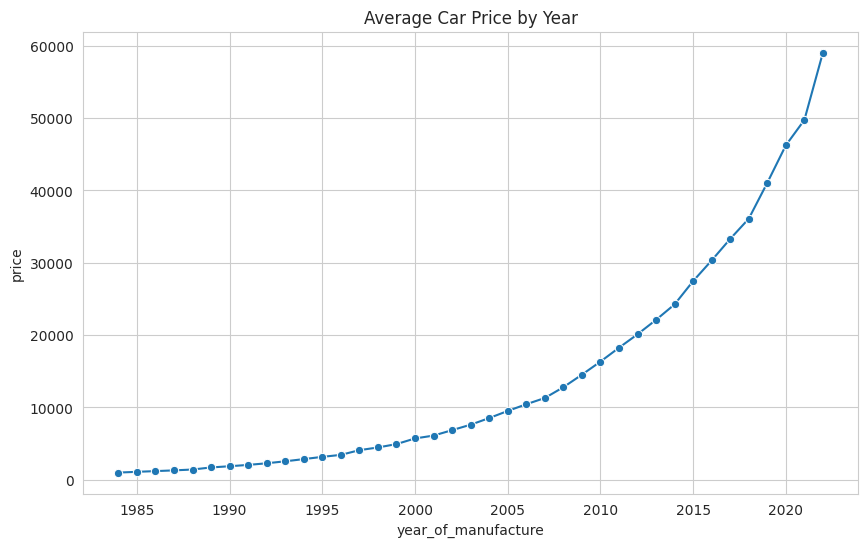

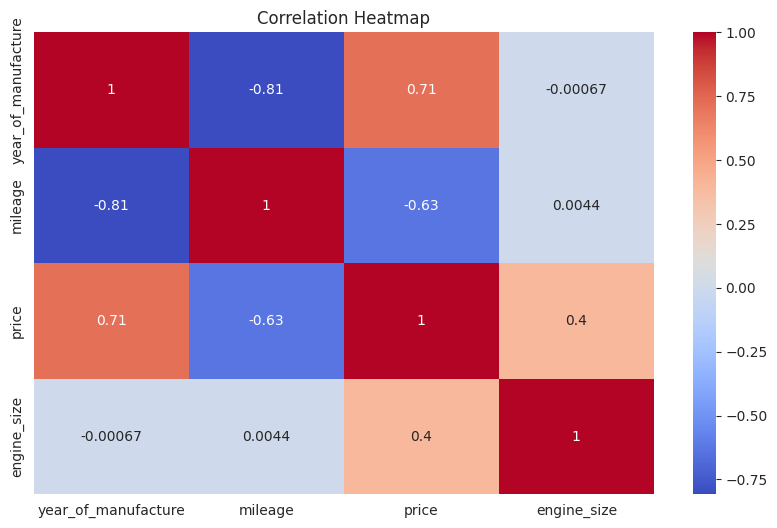

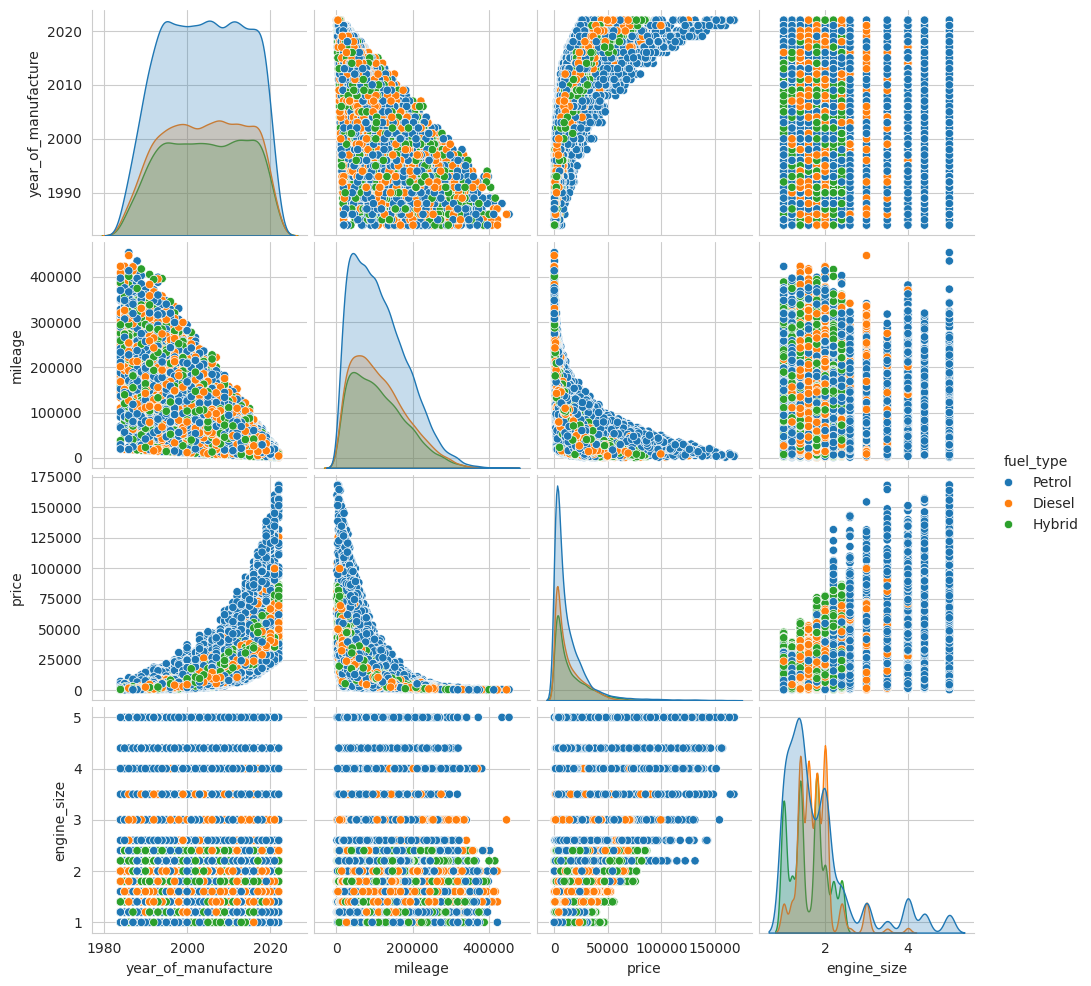

📌 Key Insights:
1. Newer cars retain higher resale prices than older cars.
2. Diesel cars have higher mileage but often lower resale value than petrol cars.
3. Certain manufacturers dominate sales, but some retain value better.
4. Price decreases as mileage increases, indicating depreciation.
5. Cars older than 2015 show significant price drop compared to recent models.


In [8]:
# -----------------------------
# 6️⃣ Exploratory Data Analysis (EDA)
# -----------------------------

# Histogram: Price distribution
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Histogram: Mileage distribution
sns.histplot(df['mileage'], bins=30, kde=True, color='green')
plt.title("Distribution of Car Mileage")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.show()

# Countplot: Manufacturers
sns.countplot(y='manufacturer', data=df, order=df['manufacturer'].value_counts().index)
plt.title("Number of Cars Sold by Manufacturer")
plt.show()

# Countplot: Fuel Types
sns.countplot(x='fuel_type', data=df)
plt.title("Count of Cars by Fuel Type")
plt.show()

# Scatterplot: Mileage vs Price
sns.scatterplot(x='mileage', y='price', hue='fuel_type', data=df)
plt.title("Mileage vs Price")
plt.show()

# Boxplot: Manufacturer vs Price
sns.boxplot(x='price', y='manufacturer', data=df)
plt.title("Manufacturer vs Price")
plt.show()

# Boxplot: Fuel Type vs Price
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

# Lineplot: Year vs Average Price
avg_price_by_year = df.groupby('year_of_manufacture')['price'].mean().reset_index()
sns.lineplot(x='year_of_manufacture', y='price', data=avg_price_by_year, marker='o')
plt.title("Average Car Price by Year")
plt.show()

# Heatmap: Correlation between numeric features
sns.heatmap(df[['year_of_manufacture','mileage','price','engine_size']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot: Year, Mileage, Price, Engine_Size
sns.pairplot(df[['year_of_manufacture','mileage','price','engine_size','fuel_type']], hue='fuel_type')
plt.show()

# -----------------------------
# 7️⃣ Insights
# -----------------------------
print("📌 Key Insights:")
print("1. Newer cars retain higher resale prices than older cars.")
print("2. Diesel cars have higher mileage but often lower resale value than petrol cars.")
print("3. Certain manufacturers dominate sales, but some retain value better.")
print("4. Price decreases as mileage increases, indicating depreciation.")
print("5. Cars older than 2015 show significant price drop compared to recent models.")